In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import glob
from sklearn import cluster
import cv2
import numpy as np
import pandas as pd


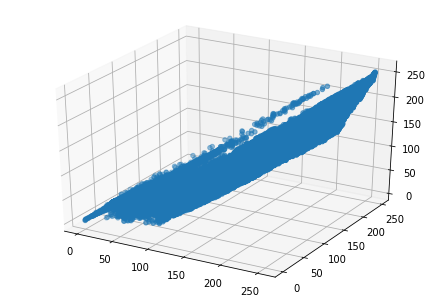

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

img = cv2.imread("/content/object_25_3_c45.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [ ]:
kk = pd.DataFrame(columns = ['img_name', 'center'])
kk.to_csv('bbox.csv', index_label=True)

def write_csv(path, b):
    kk = pd.DataFrame({'img_name' : [path.split('/')[-1]] , "center": b })
    kk.to_csv("bbox.csv", mode="a+", header= False)

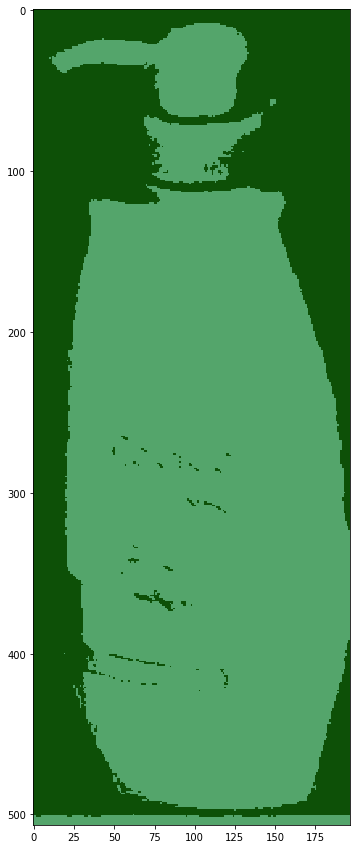

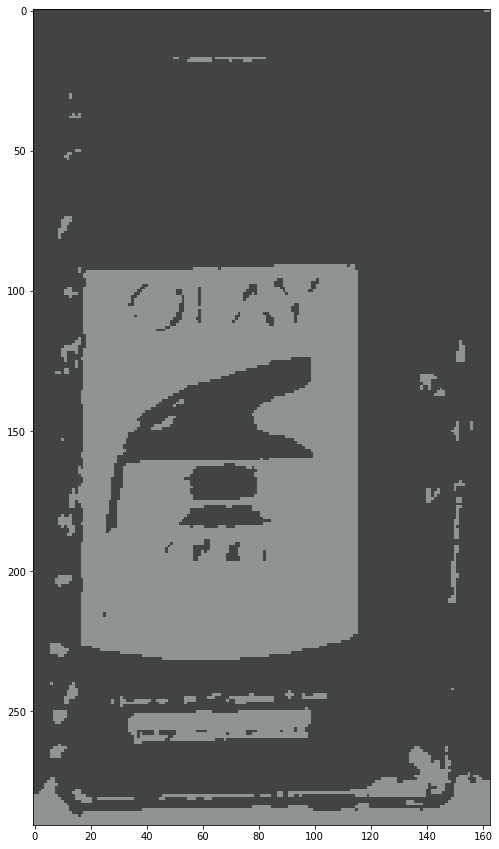

In [ ]:

img_dir  = '/content/'
for path in glob.glob(f"{img_dir}*.jpg"):
    img = cv2.imread(path)
    # print(img.shape)
    Z = img.reshape((-1,3))
    # print(Z.shape)
    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 15, 2.0)
    K = 2
    ret,label,center=cv2.kmeans(Z, K, None, criteria,10, cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    # print("*"*40)
    # print(center)
    write_csv(path, [center])
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    # plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
    # plt.xlabel('Height'),plt.ylabel('Weight')
    # plt.imsave()
    plt.figure(figsize=(15,15))
    plt.imshow(res2)


In [ ]:
507*197

99879

In [ ]:
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False



In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

# Variables
imdir = '/content/crops2k/'
targetdir = "/content/kk/"
number_clusters = 12

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
# print(filelist)
filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())




In [ ]:
number_clusters = 12

In [ ]:
# Clustering base on predifine features
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

# Copy images renamed by cluster 
# Check if target dir exists
try:
    os.makedirs(targetdir)
except OSError:
    pass
# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    # print("ok")
    print("Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir + str(m) + "_" + str(i) + ".jpg")

In [ ]:
!tar -xvzf crops2k.tar.gz 

In [ ]:
!zip -r clustered.zip kk/*

  adding: kk/0_1023.jpg (deflated 1%)
  adding: kk/0_1025.jpg (deflated 1%)
  adding: kk/0_1028.jpg (deflated 1%)
  adding: kk/0_1030.jpg (deflated 1%)
  adding: kk/0_1031.jpg (deflated 1%)
  adding: kk/0_1046.jpg (deflated 1%)
  adding: kk/0_1067.jpg (deflated 1%)
  adding: kk/0_1087.jpg (deflated 1%)
  adding: kk/0_1090.jpg (deflated 1%)
  adding: kk/0_1091.jpg (deflated 1%)
  adding: kk/0_1114.jpg (deflated 1%)
  adding: kk/0_1115.jpg (deflated 1%)
  adding: kk/0_1121.jpg (deflated 1%)
  adding: kk/0_1155.jpg (deflated 1%)
  adding: kk/0_120.jpg (deflated 1%)
  adding: kk/0_121.jpg (deflated 1%)
  adding: kk/0_1238.jpg (deflated 1%)
  adding: kk/0_1245.jpg (deflated 1%)
  adding: kk/0_1246.jpg (deflated 1%)
  adding: kk/0_1247.jpg (deflated 1%)
  adding: kk/0_1255.jpg (deflated 1%)
  adding: kk/0_1316.jpg (deflated 1%)
  adding: kk/0_1334.jpg (deflated 0%)
  adding: kk/0_1339.jpg (deflated 1%)
  adding: kk/0_1355.jpg (deflated 1%)
  adding: kk/0_1381.jpg (deflated 1%)
  adding: kk/0